### 💻 **Cloud Performance Monitoring for Infrastructure and Services**

### 🎯 **Project Objective**
The goal is to simulate and detect performance anomalies in system response times or service performance. For example, slower upload or download speeds, server overload, disk failures, or network issues can all affect performance. Anomaly detection models will be used to flag significant deviations from typical performance metrics to identify potential infrastructure or service problems.


### 🧾 **Feature List**

In [1]:



feature_list = [
    'cpu_usage_percent',         # Percentage of CPU usage
    'memory_usage_percent',      # Percentage of memory usage
    'disk_io_util_percent',      # Percentage of disk I/O usage
    'network_in_traffic',        # Incoming network traffic in MB/s
    'network_out_traffic',       # Outgoing network traffic in MB/s
    'response_time_ms',          # Response time (in milliseconds)
    'disk_read_speed_MBps',      # Disk read speed (in MB/s)
    'disk_write_speed_MBps',     # Disk write speed (in MB/s)
    'cpu_temp',                  # CPU temperature (°C)
    'disk_space_usage_percent',  # Disk space usage percentage
    'error_rate',                # Error rate (requests failed per minute)
    'request_rate',              # Number of requests per second
    'service_uptime_percent',    # Percentage of uptime
    'service_response_latency', # Service latency (in milliseconds)
    'queue_depth',               # Queue depth for request handling
    'disk_latency_ms',           # Disk latency (in milliseconds)
    'cloud_service_health'       # Health status of the service (1 for healthy, 0 for degraded)
]

### 📦 **Step 1: Import Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

### 🧑‍💻 **Step 2: Simulate Synthetic Performance Data**

In [3]:
np.random.seed(42)
num_samples = 1000

def simulate_performance_data(n):
    data = pd.DataFrame({
        'cpu_usage_percent': np.random.normal(70, 15, n),
        'memory_usage_percent': np.random.normal(60, 20, n),
        'disk_io_util_percent': np.random.normal(50, 10, n),
        'network_in_traffic': np.random.normal(100, 25, n),
        'network_out_traffic': np.random.normal(90, 20, n),
        'response_time_ms': np.random.normal(100, 20, n),
        'disk_read_speed_MBps': np.random.normal(150, 30, n),
        'disk_write_speed_MBps': np.random.normal(140, 35, n),
        'cpu_temp': np.random.normal(60, 5, n),
        'disk_space_usage_percent': np.random.normal(50, 10, n),
        'error_rate': np.random.normal(0.1, 0.05, n),
        'request_rate': np.random.normal(50, 10, n),
        'service_uptime_percent': np.random.normal(99.9, 0.1, n),
        'service_response_latency': np.random.normal(150, 30, n),
        'queue_depth': np.random.normal(5, 1, n),
        'disk_latency_ms': np.random.normal(10, 2, n),
        'cloud_service_health': np.random.choice([0, 1], n)  # Healthy or degraded service
    })
    return data

performance_data = simulate_performance_data(num_samples)
performance_data.head()

,cpu_usage_percent,memory_usage_percent,disk_io_util_percent,network_in_traffic,network_out_traffic,response_time_ms,disk_read_speed_MBps,disk_write_speed_MBps,cpu_temp,disk_space_usage_percent,error_rate,request_rate,service_uptime_percent,service_response_latency,queue_depth,disk_latency_ms,cloud_service_health
0,77.450712,87.987109,43.248217,52.304811,72.730128,91.524806,116.577559,167.481478,59.834874,57.654022,0.066075,38.218203,100.017481,150.352091,4.775759,9.713154,1
1,67.926035,78.492674,48.554813,78.490375,89.375930,90.931718,131.072075,77.781166,57.481749,60.734127,0.084725,54.328504,99.712102,165.823160,4.789165,9.934688,1
2,79.715328,61.192607,42.075801,89.659862,90.360337,64.087137,121.738194,165.016098,59.138125,54.986899,0.070131,61.107532,99.867220,101.669917,7.235427,10.128590,1
3,92.845448,47.061264,46.920385,147.192191,99.452607,93.398196,133.560125,131.819658,63.573659,30.575023,0.105521,57.551850,99.895834,122.403055,5.809311,11.893723,1
4,66.487699,73.964466,31.063853,113.913828,62.662833,114.656582,143.575491,164.761020,66.389283,48.445776,0.159859,60.844775,99.901591,145.554644,7.480651,8.505565,0


### 🧹 **Step 3: Data Preprocessing & Feature Engineering**
- **Normalize** numerical features for better performance with models.
- **One-hot encode** categorical features (such as `cloud_service_health`).

In [4]:
# We will not apply one-hot encoding in this case as 'cloud_service_health' is already binary (0 or 1).

# Standardize numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(performance_data)

performance_data_scaled = pd.DataFrame(scaled_data, columns=performance_data.columns)



### 🤖 **Step 4: Train Isolation Forest Model**

In [5]:
# Train the model using Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(performance_data_scaled)

# Predict anomaly scores and anomalies
performance_data['anomaly_score'] = model.decision_function(performance_data_scaled)
performance_data['anomaly'] = model.predict(performance_data_scaled)

# Map anomalies: 1 -> normal, -1 -> anomaly
performance_data['anomaly'] = performance_data['anomaly'].map({1: 0, -1: 1})

### 📈 **Step 5: Plot Anomaly Scores Distribution**

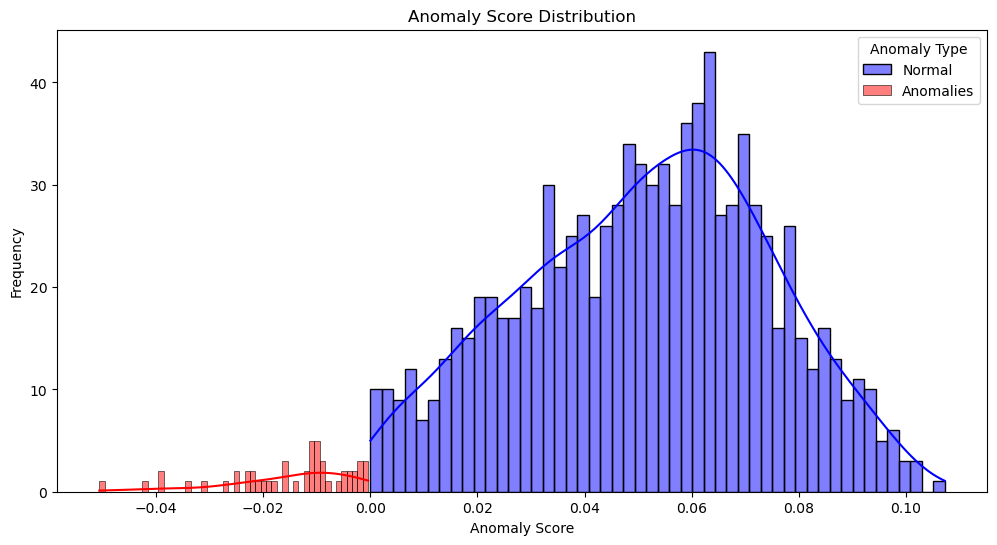

In [6]:
# Separate normal and anomalous data
normal_data = performance_data[performance_data['anomaly'] == 0]
anomalous_data = performance_data[performance_data['anomaly'] == 1]

# Plotting Anomaly Scores Distribution for Normal and Anomalous Data
plt.figure(figsize=(12, 6))

# Plot normal data (blue)
sns.histplot(normal_data['anomaly_score'], bins=50, kde=True, color='blue', label='Normal')

# Plot anomalous data (red)
sns.histplot(anomalous_data['anomaly_score'], bins=50, kde=True, color='red', label='Anomalies')

# Add titles and labels
plt.title("Anomaly Score Distribution")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend(title="Anomaly Type")
plt.show()

### 🧪 **Step 6: Test on Unseen Synthetic Test Data**

In [7]:
# Generate synthetic test data with anomalies
test_data = simulate_performance_data(200)

# Inject anomalies by altering certain features
anomaly_indices = random.sample(range(200), 15)
test_data.iloc[anomaly_indices, 0:5] += 50  # Inflate CPU usage, memory usage, etc.
test_data.iloc[anomaly_indices, 6] += 10   # Increase response time
test_data.iloc[anomaly_indices, 10] += 5    # Increase error rate
test_data.iloc[anomaly_indices, 12] = 80    # Change service uptime to unhealthy

# Preprocess the test data
test_data_scaled = scaler.transform(test_data)

# Predict anomalies on the test data
test_data['anomaly'] = model.predict(test_data_scaled)
test_data['anomaly'] = test_data['anomaly'].map({1: 0, -1: 1})

# Extract anomalies for inspection
anomalies = test_data[test_data['anomaly'] == 1]

# Display the detected anomalies
anomalies.head()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,cpu_usage_percent,memory_usage_percent,disk_io_util_percent,network_in_traffic,network_out_traffic,response_time_ms,disk_read_speed_MBps,disk_write_speed_MBps,cpu_temp,disk_space_usage_percent,error_rate,request_rate,service_uptime_percent,service_response_latency,queue_depth,disk_latency_ms,cloud_service_health,anomaly
18,76.290128,94.602335,43.499062,105.896627,139.682882,89.022923,151.540763,157.238321,59.057566,16.640985,0.079300,46.107889,100.096072,105.415132,5.530423,8.267931,1,1
26,47.386223,86.616078,29.902666,112.005732,85.178916,98.782280,196.467539,93.225915,57.453275,58.158535,0.168918,22.585106,100.115116,144.306651,5.550679,9.946200,1,1
27,133.626677,103.213283,94.509456,167.896616,145.478715,103.806203,204.584777,109.300312,60.973870,52.529272,5.081694,53.882150,80.000000,165.190904,5.868175,10.337385,1,1
40,130.028439,149.665453,105.198290,156.064898,109.571340,161.933910,176.314200,155.576494,53.840657,34.785579,5.109355,54.427533,80.000000,181.831256,4.333444,14.931855,0,1
44,25.993440,61.595769,28.528679,93.159836,95.923691,102.495277,181.192869,147.062479,63.603053,51.948388,-0.026292,57.310375,99.867145,188.063418,5.861649,13.947467,1,1


### 📤 **Step 7: Export Anomalies to CSV**

In [8]:
anomalies.to_csv("performance_monitoring_anomalies.csv", index=False)
print(f"Exported {len(anomalies)} anomalies to 'performance_monitoring_anomalies.csv'")

Exported 23 anomalies to 'performance_monitoring_anomalies.csv'
